# MNIST Task

This notebook contains the main results for the MNIST task, presented as Figure 6 in the paper. **Note:** in this notebook we select the Fourier components slightly differently than in the paper, but the results should be similar.

In [19]:
from utils_mnist import *
import matplotlib as mpl

## Set optimization parameters

For consistency, we set the training parameters to be used in the models below.

In [2]:
epochs = 200
batch_size = 512
N_classes = 10

## Load dataset

In [3]:
mnist_dp = MNISTDataProcessor()

In [4]:
data_N16 = mnist_dp.fourier(2)
# data_N36 = mnist_dp.fourier(3)
# data_N144 = mnist_dp.fourier(6)

## Initialize the models

In [5]:
# The ONN with the electro-optic activation function
model_eo_N16 = construct_onn_EO_tf(16, L=2)
model_eo_N16.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Just a linear ONN
model_linear_N16 = construct_onn_linear_tf(16, L=2)
model_linear_N16.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


# model_eo_N36 = construct_onn_EO_tf(36)
# model_eo_N36.compile(optimizer='adam',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy'])

# model_eo_N144 = construct_onn_EO_tf(144)
# model_eo_N144.compile(optimizer='adam',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy'])

## Train a linear ONN


In [6]:
history_linear = model_linear_N16.fit(data_N16.x_train,
                          data_N16.y_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(data_N16.x_test, data_N16.y_test),
                          verbose=2)

# model_linear_N16_vars = [var.numpy() for var in model_linear_N16.variables]

W0715 15:43:30.994544 4541961664 deprecation.py:323] From /Users/iwill/miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 - 5s - loss: 1.8560 - accuracy: 0.3679 - val_loss: 1.5002 - val_accuracy: 0.6124
Epoch 2/200
60000/60000 - 2s - loss: 1.3794 - accuracy: 0.6647 - val_loss: 1.2713 - val_accuracy: 0.7287
Epoch 3/200
60000/60000 - 2s - loss: 1.2388 - accuracy: 0.7271 - val_loss: 1.1863 - val_accuracy: 0.7583
Epoch 4/200
60000/60000 - 2s - loss: 1.1757 - accuracy: 0.7519 - val_loss: 1.1408 - val_accuracy: 0.7737
Epoch 5/200
60000/60000 - 2s - loss: 1.1435 - accuracy: 0.7642 - val_loss: 1.1177 - val_accuracy: 0.7813
Epoch 6/200
60000/60000 - 2s - loss: 1.1282 - accuracy: 0.7694 - val_loss: 1.1030 - val_accuracy: 0.7853
Epoch 7/200
60000/60000 - 2s - loss: 1.1107 - accuracy: 0.7745 - val_loss: 1.0897 - val_accuracy: 0.7871
Epoch 8/200
60000/60000 - 2s - loss: 1.0996 - accuracy: 0.7790 - val_loss: 1.0807 - val_accuracy: 0.7928
Epoch 9/200
60000/60000 - 2s - loss: 1.0903 - accuracy: 0.7824 - val_loss: 1.0707 - val_accuracy: 0.7937
Epoch

In [7]:
model_linear_N16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rm_2 (RM)                    multiple                  272       
_________________________________________________________________
rm_3 (RM)                    multiple                  272       
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
_________________________________________________________________
lambda_1 (Lambda)            multiple                  0         
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


Acc = 0.8178


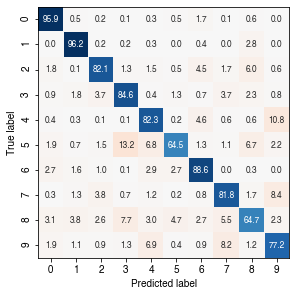

In [8]:
cf_matrix = calc_confusion_matrix_tf(model_linear_N16, data_N16.x_test, data_N16.y_test)
fig = plot_confusion_matrix(cf_matrix);

## Training an ONN with the electro-optic activation


In [9]:
history_eo = model_eo_N16.fit(data_N16.x_train,
                          data_N16.y_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(data_N16.x_test, data_N16.y_test),
                          verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 - 5s - loss: 2.8950 - accuracy: 0.1628 - val_loss: 2.0011 - val_accuracy: 0.2943
Epoch 2/200
60000/60000 - 2s - loss: 1.6967 - accuracy: 0.4252 - val_loss: 1.4306 - val_accuracy: 0.5423
Epoch 3/200
60000/60000 - 2s - loss: 1.2792 - accuracy: 0.6064 - val_loss: 1.1332 - val_accuracy: 0.6684
Epoch 4/200
60000/60000 - 2s - loss: 1.0563 - accuracy: 0.6909 - val_loss: 0.9551 - val_accuracy: 0.7355
Epoch 5/200
60000/60000 - 2s - loss: 0.9136 - accuracy: 0.7365 - val_loss: 0.8494 - val_accuracy: 0.7627
Epoch 6/200
60000/60000 - 2s - loss: 0.8207 - accuracy: 0.7631 - val_loss: 0.7774 - val_accuracy: 0.7786
Epoch 7/200
60000/60000 - 2s - loss: 0.7560 - accuracy: 0.7819 - val_loss: 0.7288 - val_accuracy: 0.7952
Epoch 8/200
60000/60000 - 2s - loss: 0.7095 - accuracy: 0.7954 - val_loss: 0.6924 - val_accuracy: 0.8065
Epoch 9/200
60000/60000 - 2s - loss: 0.6740 - accuracy: 0.8060 - val_loss: 0.6628 - val_accuracy: 0.8126
Epoch

Acc = 0.9053


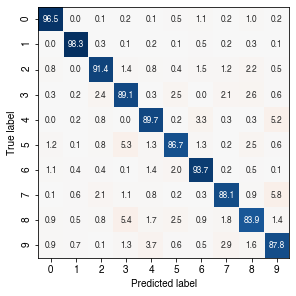

In [10]:
cf_matrix = calc_confusion_matrix_tf(model_eo_N16, data_N16.x_test, data_N16.y_test)
fig = plot_confusion_matrix(cf_matrix);

Compare the training history of the two models:

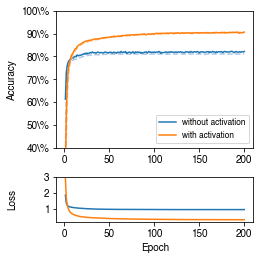

In [23]:
plot_model_comparison([history_linear, history_eo], 
                          ['without activation', 'with activation'],
                          figsize=(3.5,3.5),
                          axs=None,
                          ylim_acc=[40,100],
                          height_ratios=[1,0.33]);